# FILER API `get_overlapping_tracks_by_coord` endpoint in Jupyter


2021 April 13 FILER API ppt slide #8-9

<div>
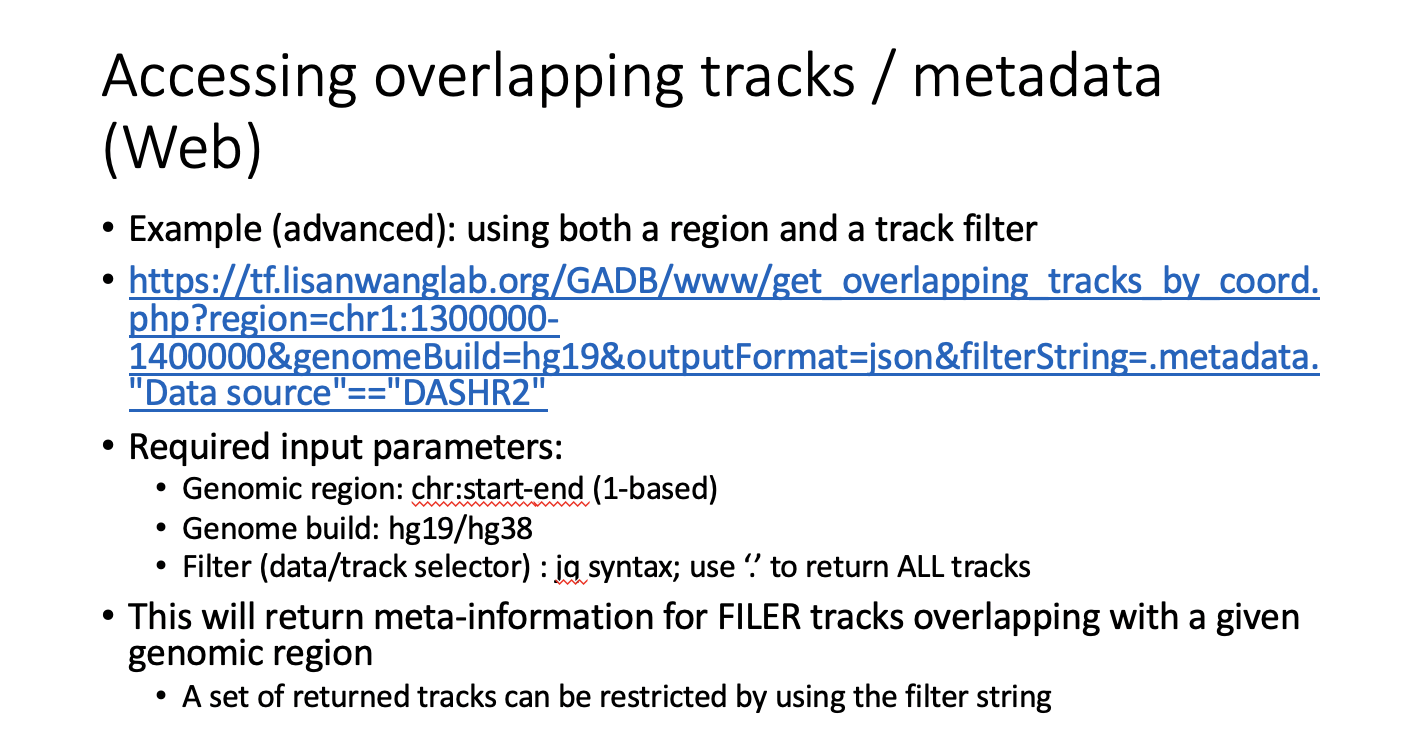
</div>  


<div>
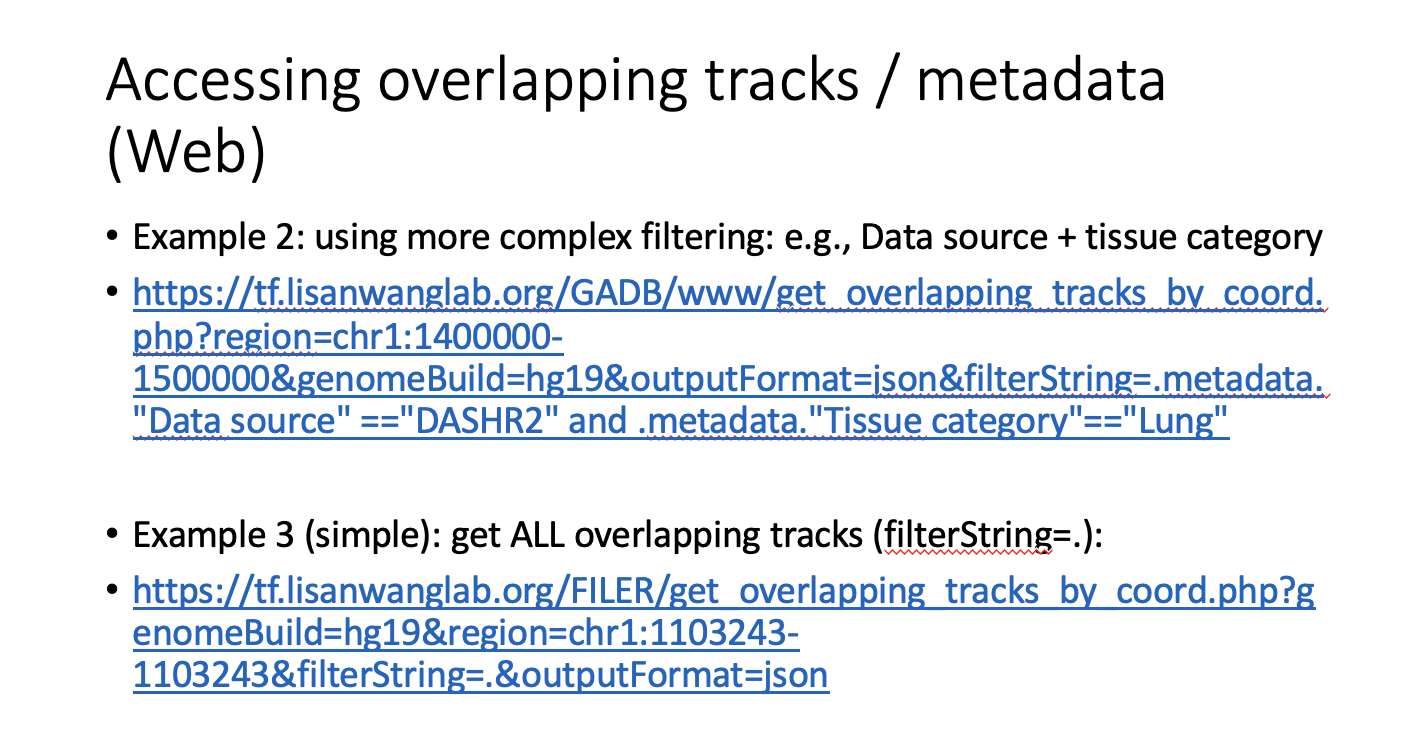
</div>  


### API variables

In [1]:
requestURL = 'https://tf.lisanwanglab.org/FILER'
endpoint = 'get_overlapping_tracks_by_coord.php'

### Setup

Imports

In [2]:
import urllib.parse
import json, requests, pprint
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Helper functions

In [3]:
def get_query_url(requestURL, endpoint):
    return ''.join([requestURL, '/', endpoint, '?'])


def process_request(requestUri, payload=None):
    ''' process request '''
    
    response = requests.get(requestUri, params=payload)
    rjson = None
    
    if response:
        print('Success!')
    else:
        print('An error has occurred:' + str(response.status_code))
    
    try: 
        rjson = response.json()
        print('Response JSON decoded')
    except ValueError:
        print('Error occurred: response JSON decode failed')
        print('response.content =\t', response.content.decode())
    
    return rjson


<br>  

## API request

#### get endpoint URL

In [4]:
_url_endpoint = get_query_url(requestURL, endpoint)

print(_url_endpoint)

https://tf.lisanwanglab.org/FILER/get_overlapping_tracks_by_coord.php?


#### API request

In [5]:
## example query params
_params = {
    'genomeBuild':'hg19', 
    'region':'chr1:1103243-1103243', 
    'filterString':'.', 
    'outputFormat':'json'
}


## process API request
rjson = process_request(_url_endpoint, _params)


## display response
print("Response length =\t", len(rjson))
print("Response type =\t ", type(rjson))
if isinstance(rjson, list):
    pprint.pprint(rjson[:2])
else:
    pprint.pprint(rjson)

Success!
Response JSON decoded
Response length =	 1859
Response type =	  <class 'list'>
[{'Antibody': 'Not applicable',
  'Assay': 'DNase-seq',
  'Biological replicate(s)': 1,
  'Biosample type': 'cell line',
  'Biosamples term id': 'EFO:0005713',
  'Data Category': 'Called peaks',
  'Data Source': 'ENCODE',
  'Date added to GADB': '8/10/2018',
  'Downloaded date': '6/4/2018',
  'ENCODE Experiment id': 'ENCSR000EID',
  'File format': 'bed narrowPeak',
  'File name': 'ENCFF237NQC.bed.gz',
  'File size': 1412420,
  'Genome build': 'hg19',
  'Identifier': 'NGEN004055',
  'Link out URL': 'https://www.encodeproject.org',
  'Number of intervals': 144749,
  'Output type': 'peaks',
  'Processed File Download URL': 'https://tf.lisanwanglab.org/GADB/Annotationtracks/ENCODE/data/DNase-seq/narrowpeak/hg19/ENCFF237NQC.bed.gz',
  'Processed file md5': '5691284a892227cb4d024b6b583dc934',
  'Raw File URL': 'https://www.encodeproject.org/files/ENCFF237NQC/@@download/ENCFF237NQC.bigBed',
  'Raw file dow

<br>  

## Convert response list of json dicts to Pandas DataFrame

In [6]:
if isinstance(rjson, list):
    df = pd.DataFrame(rjson)
else:
    df = pd.DataFrame.from_dict(rjson, orient='index').T


df.shape
df.head()
df.columns

(1859, 34)

Identifier Data Source           File name  Number of intervals  \
0  NGEN004055      ENCODE  ENCFF237NQC.bed.gz               144749   
1  NGEN011624      ENCODE  ENCFF729HDN.bed.gz               116678   
2  NGEN000003      ENCODE  ENCFF000AIL.bed.gz               135357   
3  NGEN000034      ENCODE  ENCFF000LBT.bed.gz               150822   
4  NGEN000036      ENCODE  ENCFF000LCP.bed.gz               141294   

   bp covered Output type Genome build cell type Biosample type  \
0    21683857       peaks         hg19     8988T      cell line   
1    41574526    hotspots         hg19     8988T      cell line   
2   485114878       peaks         hg19      A549      cell line   
3  6502219004    clusters         hg19      A549      cell line   
4  5423643057    clusters         hg19      A549      cell line   

  Biosamples term id  ...                                       wget command  \
0        EFO:0005713  ...  wget https://tf.lisanwanglab.org/GADB/Annotati...   
1        EFO:0005713  ...  wget https://tf.lisanwanglab.org/GADB/Annotati...   
2        EFO:0001086  ...  wget https://tf.lisanwanglab.org/GADB/Annotati...   
3        EFO:0001086  ...  wget https://tf.lisanwanglab.org/GADB/Annotati...   
4        EFO:0001086  ...  wget https://tf.lisanwanglab.org/GADB/Annotati...   

                                tabix_index Download  \
0  wget https://tf.lisanwanglab.org/GADB/Annotati...   
1  wget https://tf.lisanwanglab.org/GADB/Annotati...   
2  wget https://tf.lisanwanglab.org/GADB/Annotati...   
3  wget https://tf.lisanwanglab.org/GADB/Annotati...   
4  wget https://tf.lisanwanglab.org/GADB/Annotati...   

                    Link out URL  \
0  https://www.encodeproject.org   
1  https://www.encodeproject.org   
2  https://www.encodeproject.org   
3  https://www.encodeproject.org   
4  https://www.encodeproject.org   

                                        Raw File URL  \
0  https://www.encodeproject.org/files/ENCFF237NQ...   
1  https://www.encodeproject.org/files/ENCFF729HD...   
2  https://www.encodeproject.org/files/ENCFF000AI...   
3  https://www.encodeproject.org/files/ENCFF000LB...   
4  https://www.encodeproject.org/files/ENCFF000LC...   

                                   Raw file download  \
0  wget https://tf.lisanwanglab.org/GADB/Annotati...   
1  wget https://tf.lisanwanglab.org/GADB/Annotati...   
2  wget https://tf.lisanwanglab.org/GADB/Annotati...   
3  wget https://tf.lisanwanglab.org/GADB/Annotati...   
4  wget https://tf.lisanwanglab.org/GADB/Annotati...   

                       Raw file md5 Data Category  \
0  1c1ecd5f4fb68e6404e870473f1f8148  Called peaks   
1  ec9d307083742dc68841ee95cffbc5bd  Called peaks   
2  c1c2485b6a16df7c288adbda48a435a9  Called peaks   
3  a55d1d5fe467d63fe98bd3d0e5c8d436      Clusters   
4  596719ed8e956dc972602fb84f26be99      Clusters   

                        classification original cell type name system category  
0                      DNase-seq peaks                   8988T       Digestive  
1                   DNase-seq hotspots                   8988T       Digestive  
2  ChIP-seq H3K4me1-histone-mark peaks                    A549     Respiratory  
3                     RNA-PET clusters                    A549     Respiratory  
4                     RNA-PET clusters                    A549     Respiratory  

[5 rows x 34 columns]

Index(['Identifier', 'Data Source', 'File name', 'Number of intervals',
       'bp covered', 'Output type', 'Genome build', 'cell type',
       'Biosample type', 'Biosamples term id', 'Tissue category',
       'ENCODE Experiment id', 'Biological replicate(s)',
       'Technical replicate', 'Antibody', 'Assay', 'File format', 'File size',
       'filepath', 'Downloaded date', 'Release date', 'Date added to GADB',
       'Processed File Download URL', 'Processed file md5', 'wget command',
       'tabix_index Download', 'Link out URL', 'Raw File URL',
       'Raw file download', 'Raw file md5', 'Data Category', 'classification',
       'original cell type name', 'system category'],
      dtype='object')